In [ ]:
표준점수로 데이터 전처리 하기
표준점수는 가장 널리 사용하는 데이터 전처리 방법 중 하나이다.
표준점수 = (데이터 - 평균) / 표준편차


In [174]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [175]:
fish_data = []             #fish_data 빈 list

for l, w in zip(fish_length, fish_weight):     #zip : 두개의 리스트에서 하나씩 뺀다. 두개의 리스트는length, weight
    fish_data.append([l, w])    # appen 추가하다. 
    
print(fish_data)
fish_data[0]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


[25.4, 242.0]

In [176]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))    #np.column_stack은 [1, 10]조합으로 만들어줌
#fish_data = np.column_stack(([1,2,3], [10,20,30]))

# [
#     [1, 10]
#     [2, 20]
#     [3, 30]
# ]


In [177]:
# fish_target = [1] * 35 + [0] * 14
# o = np.ones(35)
# z = np.zeros(14)
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # concatenate 합시다.
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [178]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)    #kneighbors 5 , 숫자를 결정한다.
kn.fit(fish_data, fish_target)   # 학습시키다.

KNeighborsClassifier()

In [179]:
# 피클 저장

# 모델 저장하기    # 훈련시킨거 model.pkl로 저장함.
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(kn, f)   # 훈련결과(kn) 저장

# 모델 불러오기
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)    #위의 훈련결과(kn)을 fish_model로 불러온다    #훈련결과가 fish_model

fish_model.predict([[30.1, 600.123]])   #fish_model을 이용해서 [30.1, 600.123]  예측한다(predict)

array([1.])

In [180]:
# 왜? 도미토리는? 0이 나오지?
kn.predict([[25, 150]])

array([0.])

In [181]:
# [25, 150] 값주변에 가장 가까운 5개를 뽑는다 (kneighbors)
# distances = 거리 array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191, 138.32150953]]), 가까운 5개 거리 
# indexes = 몇번째인지 자료 순서 array([[ 0, 48, 47, 45, 46]]))

distances, indexes = kn.kneighbors([[25, 150]])   # kneighbors 이웃찾기
kn.kneighbors([[25, 150]])   

#25, 150과 가까운 거리 92.0000 ~~ 이렇게 어레이 5개

(array([[ 92.00086956, 130.48375378, 130.73859415, 137.17988191,
         138.32150953]]),
 array([[ 0, 48, 47, 45, 46]]))

In [182]:
#25,150에 가까운 fish_data에 들어있는 0번째 데이터가 array([ 25.4, 242. ]) 얘다.
fish_data[0]
# 48번째 데이터가 두번째로 가까움 array([15. , 19.9])
fish_data[48]

array([15. , 19.9])

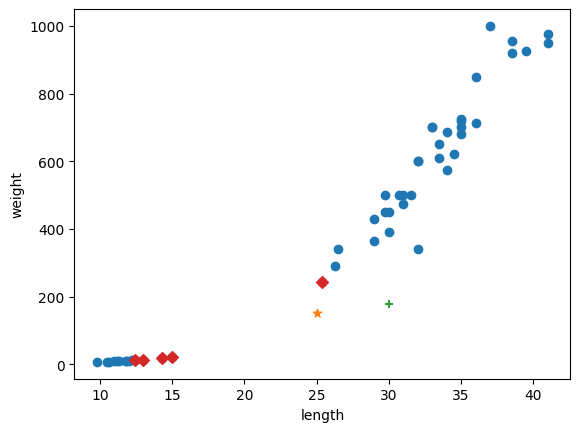

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [183]:
import matplotlib.pyplot as plt   #차트 임포트
plt.scatter(fish_data[:,0], fish_data[:,1]) # fish_data 인덱스 자리
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter( 25 , 150 , marker='*' )
plt.scatter( 30 , 177 , marker='+' )
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')   #[25, 150] 이웃값 5개
#plt.xlim((0, 1000)) # 축 변경 
plt.show()
print(fish_data)

In [184]:
# 표준점수(standard score)
# 표준점수 = (데이터 - 평균) / 표준편차

mean = np.mean(fish_data, axis=0)     # 각 열의 평균 계산   # 데이터 평균은 mean   # axis=0 행방향
std = np.std(fish_data, axis=0)   # 각 열의 표준편차 계산
  
print(mean)
print(std)

[ 27.05510204 444.5       ]
[ 10.13774642 324.77757224]


In [185]:
train_scaled = (fish_data - mean) /std   # 표준점수 = (데이터 - 평균) / 표준편차
print(train_scaled)

[[-0.16326134 -0.62350364]
 [-0.07448421 -0.47571019]
 [-0.05475596 -0.32175867]
 [ 0.19184717 -0.25094097]
 [ 0.19184717 -0.04464594]
 [ 0.26089605  0.01693467]
 [ 0.26089605  0.17088618]
 [ 0.29048842 -0.16780715]
 [ 0.29048842  0.01693467]
 [ 0.3595373   0.17088618]
 [ 0.38912967  0.09391043]
 [ 0.38912967  0.17088618]
 [ 0.4384503   0.17088618]
 [ 0.48777093 -0.32175867]
 [ 0.48777093  0.47878922]
 [ 0.48777093  0.47878922]
 [ 0.58641218  0.78669225]
 [ 0.58641218  0.78669225]
 [ 0.6357328   0.50957952]
 [ 0.6357328   0.63274074]
 [ 0.68505343  0.40181346]
 [ 0.68505343  0.7405068 ]
 [ 0.73437406  0.54036983]
 [ 0.78369468  0.72511165]
 [ 0.78369468  0.78669225]
 [ 0.78369468  0.86366801]
 [ 0.78369468  0.84827286]
 [ 0.88233593  0.82979868]
 [ 0.88233593  1.2485468 ]
 [ 0.98097719  1.71040136]
 [ 1.12893906  1.46407893]
 [ 1.12893906  1.57184499]
 [ 1.22758032  1.47947408]
 [ 1.37554219  1.6334256 ]
 [ 1.37554219  1.55644984]
 [-1.70206487 -1.34799948]
 [-1.63301599 -1.34553626]
 

In [186]:
# 학습
kn.fit(train_scaled, fish_target)

KNeighborsClassifier()

In [187]:
# 예측
# 0~1사이의 값을 만드는거 scaling
# 도미 : 1 , 빙어 : 0
domi = [25, 150]
domi_scaled = (domi - mean) / std  # 표준점수 = (데이터 - 평균) / 표준편차
kn.predict([domi_scaled])

array([1.])

In [188]:
# 산점도 다시 그려보기 (이웃 포함)





distances, indexes = kn.kneighbors([[25, 150]])
kn.kneighbors([[25, 150]])

(array([[150.22223046, 150.23566623, 150.31168481, 150.33544076,
         150.41101874]]),
 array([[29, 33, 34, 31, 32]]))

In [189]:
#25,150에 가까운 fish_data에 들어있는 29번째 데이터가 array([  37., 1000.]) 얘다.
fish_data[29]
# 33번째 데이터가 두번째로 가까움 array([ 41., 975.])
fish_data[33]

array([ 41., 975.])

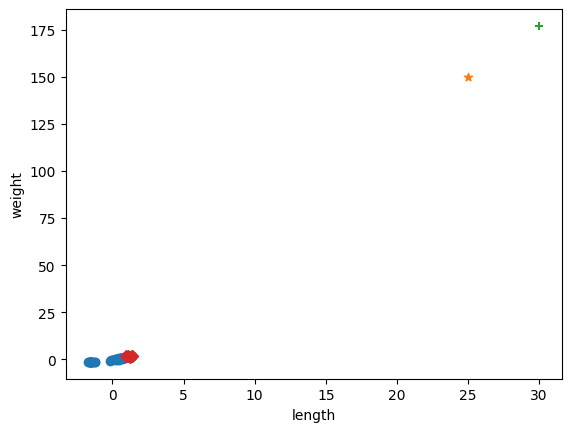

In [190]:
import matplotlib.pyplot as plt   #차트 임포트
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter( 25 , 150 , marker='*' )
plt.scatter( 30 , 177 , marker='+' )
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')   #[25, 150] 이웃값 5개
#plt.xlim((0, 1000)) # 축 변경 
plt.show()

In [92]:
# 실습

# kn = KNeighborsClassifier(n_neighbors=5) 의 k(이웃) 갑을
# 1, 5, 15, 25, 49로 변경해서 훈련, 예측, 산점도 그려보기

# k값을 49로 하면 항상 도미로 나옴



In [ ]:
def neighbor_s(n):
    knns=KNeighborsClassifier(n_neighbors=n)
    knns.fit(scaled_fish,fish_target)
    
    data=[25,150]
    scaled_data=(data-mean)/std
    
    scaled_dist, scaled_idx = knns.kneighbors([scaled_data])
    
    plt.scatter(scaled_fish[:35,0],scaled_fish[:35,1],color="#F9A8A0")
    plt.scatter(scaled_fish[35:,0],scaled_fish[35:,1],color="#CFE6CC")
    plt.xlabel("length")
    plt.ylabel("weight")
    
    plt.scatter(scaled_data[0],scaled_data[1],marker="^", color="b")
    plt.scatter(scaled_fish[scaled_idx,0],scaled_fish[scaled_idx,1], color="r")
    
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

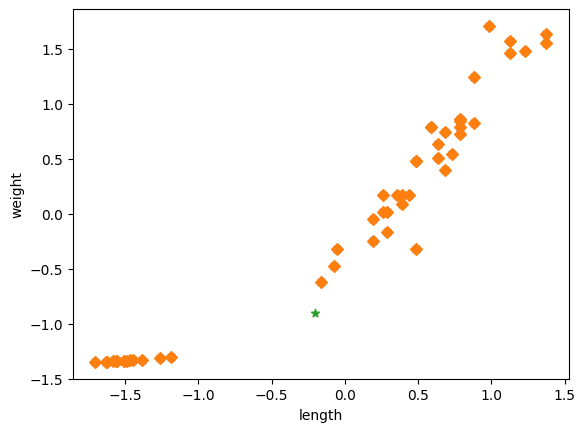

In [201]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=49)

mean = np.mean(fish_data,axis=0)
std = np.std(fish_data,axis=0)
train_scale = (fish_data - mean) / std

# 학습
kn.fit(train_scaled, fish_target)

domi = [25,150]
domi_scale = (domi - mean) /std 
kn.predict([domi_scale])
distances, indexs = kn.kneighbors([domi_scale])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.scatter(train_scaled[indexs,0], train_scaled[indexs,1], marker='D')
plt.scatter(domi_scale[0],domi_scale[1], marker='*')
plt.show